In [5]:
import pandas as pd

df = pd.read_csv(r"E:\data\athlete_events.csv")

# Quick check
df.head()
df.info()


PermissionError: [Errno 13] Permission denied: 'E:\\data\\athlete_events.csv'

In [7]:
import pandas as pd

df = pd.read_csv(r"E:\data\athlete_events.csv")

# Quick check
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [8]:
# Remove duplicate rows if any
df = df.drop_duplicates()
print("Remaining rows:", len(df))



Remaining rows: 269731


In [9]:
# Fill numeric columns with median
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Height'].fillna(df['Height'].median(), inplace=True)
df['Weight'].fillna(df['Weight'].median(), inplace=True)

# Fill Medal missing with "None"
df['Medal'].fillna("None", inplace=True)


C:\Users\mayur\AppData\Local\Temp\ipykernel_12232\2890850190.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\mayur\AppData\Local\Temp\ipykernel_12232\2890850190.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [10]:
# Create a proper copy of df to avoid chained assignment issues
df = df.copy()

# Fill missing numeric columns
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Height'] = df['Height'].fillna(df['Height'].median())
df['Weight'] = df['Weight'].fillna(df['Weight'].median())

# Fill Medal missing with "None"
df['Medal'] = df['Medal'].fillna("None")



In [11]:
def age_group(age):
    if age < 18:
        return "Teen"
    elif age <= 25:
        return "Young"
    elif age <= 30:
        return "Prime"
    elif age <= 40:
        return "Experienced"
    else:
        return "Veteran"

df['Age_Group'] = df['Age'].apply(age_group)


In [12]:
medal_points = {'Gold': 3, 'Silver': 2, 'Bronze': 1, 'None': 0}
df['Medal_Points'] = df['Medal'].map(medal_points)


In [13]:
# Check missing values
print(df.isnull().sum())

# Basic stats
print(df.describe())

# Top 10 countries by total medal points
top_countries = df.groupby('Team')['Medal_Points'].sum().sort_values(ascending=False).head(10)
print(top_countries)

# Count of athletes per age group
print(df['Age_Group'].value_counts())


ID              0
Name            0
Sex             0
Age             0
Height          0
Weight          0
Team            0
NOC             0
Games           0
Year            0
Season          0
City            0
Sport           0
Event           0
Medal           0
Age_Group       0
Medal_Points    0
dtype: int64
                  ID            Age         Height         Weight  \
count  269731.000000  269731.000000  269731.000000  269731.000000   
mean    68264.949591      25.404536     175.265046      70.541699   
std     39026.253843       6.062324       9.302366      12.610136   
min         1.000000      10.000000     127.000000      25.000000   
25%     34655.500000      22.000000     170.000000      63.000000   
50%     68233.000000      24.000000     175.000000      70.000000   
75%    102111.000000      28.000000     180.000000      76.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year   Medal_Points  
count  269731.000000 

In [14]:
medal_summary = df.pivot_table(
    index='Year', 
    columns='Sex', 
    values='Name', 
    aggfunc='count'
)
print(medal_summary)


Sex        F        M
Year                 
1896     NaN    380.0
1900    33.0   1865.0
1904    16.0   1285.0
1906    11.0   1722.0
1908    47.0   3022.0
1912    87.0   3953.0
1920   134.0   4158.0
1924   251.0   5319.0
1928   424.0   4814.0
1932   287.0   2530.0
1936   528.0   6618.0
1948   743.0   6640.0
1952  1682.0   7676.0
1956  1139.0   5295.0
1960  1730.0   7505.0
1964  1752.0   7728.0
1968  2193.0   8286.0
1972  2608.0   9351.0
1976  2606.0   7896.0
1980  2186.0   6751.0
1984  2983.0   8605.0
1988  4223.0  10453.0
1992  5178.0  11235.0
1994  1105.0   2055.0
1996  5008.0   8772.0
1998  1384.0   2221.0
2000  5431.0   8390.0
2002  1582.0   2527.0
2004  5546.0   7897.0
2006  1757.0   2625.0
2008  5816.0   7786.0
2010  1847.0   2555.0
2012  5815.0   7105.0
2014  2023.0   2868.0
2016  6223.0   7465.0


Matplotlib is building the font cache; this may take a moment.


Dataset shape: (271116, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None
   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           C

C:\Users\mayur\AppData\Local\Temp\ipykernel_12232\677079795.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


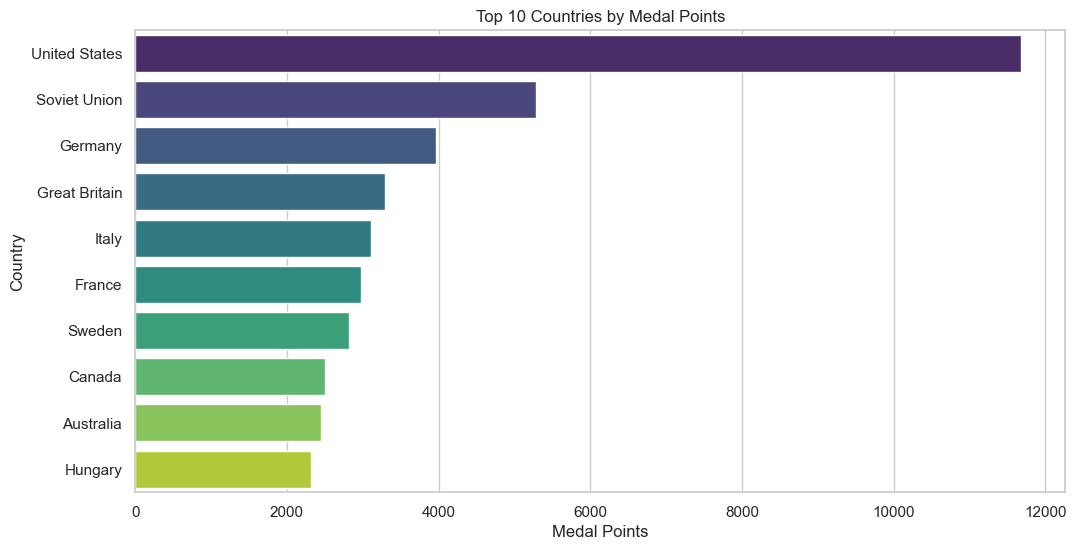

C:\Users\mayur\AppData\Local\Temp\ipykernel_12232\677079795.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age_Group', data=df, order=['Teen','Young','Prime','Experienced','Veteran'], palette="magma")


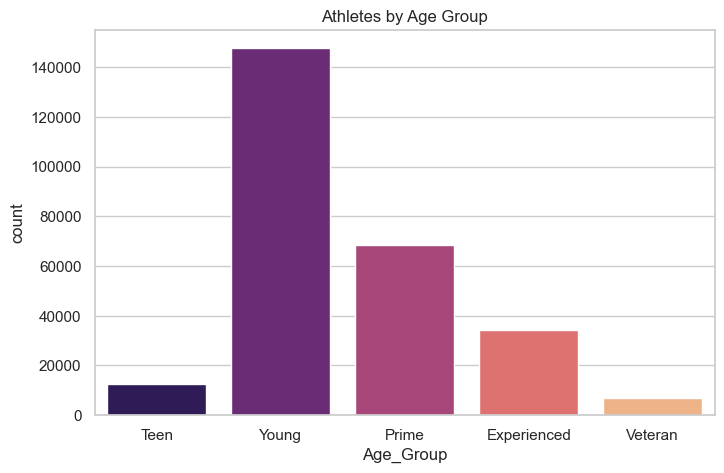

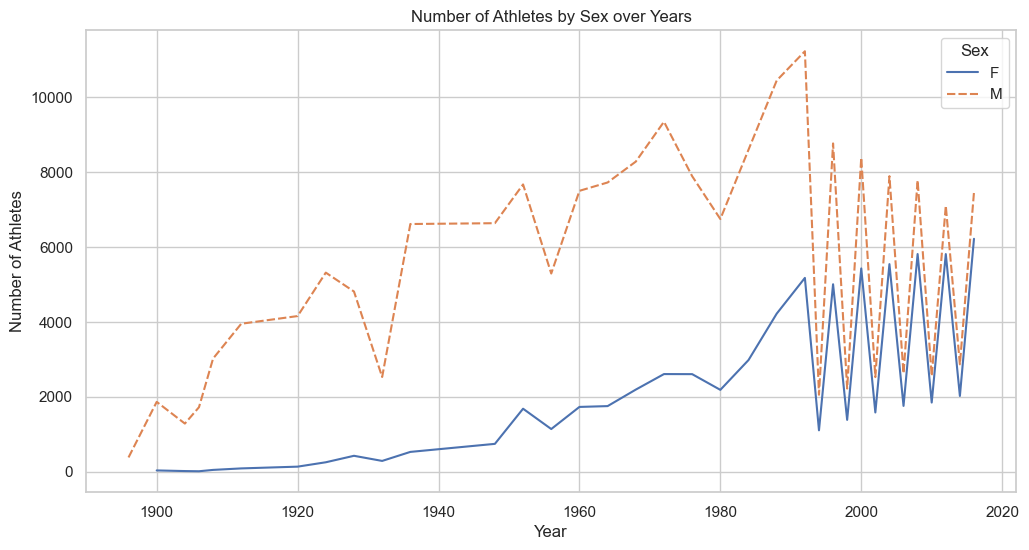

In [15]:
# ===========================
# Olympics Data Cleaning & Analysis
# ===========================

# 1️⃣ Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: better plots
sns.set(style="whitegrid")

# ---------------------------
# 2️⃣ Load the dataset
# ---------------------------
file_path = r"E:\data\athlete_events.csv"  # <- replace with your correct path
df = pd.read_csv(file_path)

# Quick check
print("Dataset shape:", df.shape)
print(df.info())
print(df.head())

# ---------------------------
# 3️⃣ Remove duplicates
# ---------------------------
df = df.drop_duplicates()
print("Rows after removing duplicates:", len(df))

# ---------------------------
# 4️⃣ Fill missing values
# ---------------------------
df = df.copy()  # avoid chained assignment warnings

# Fill numeric columns with median
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Height'] = df['Height'].fillna(df['Height'].median())
df['Weight'] = df['Weight'].fillna(df['Weight'].median())

# Fill Medal with "None"
df['Medal'] = df['Medal'].fillna("None")

# ---------------------------
# 5️⃣ Create helper columns
# ---------------------------

# Age Group
def age_group(age):
    if age < 18:
        return "Teen"
    elif age <= 25:
        return "Young"
    elif age <= 30:
        return "Prime"
    elif age <= 40:
        return "Experienced"
    else:
        return "Veteran"

df['Age_Group'] = df['Age'].apply(age_group)

# Medal Points for scoring
medal_points = {'Gold': 3, 'Silver': 2, 'Bronze': 1, 'None': 0}
df['Medal_Points'] = df['Medal'].map(medal_points)

# ---------------------------
# 6️⃣ Basic checks
# ---------------------------
print("Missing values after cleaning:\n", df.isnull().sum())
print(df.describe())

# ---------------------------
# 7️⃣ Analytics Examples
# ---------------------------

# Top 10 countries by total medal points
top_countries = df.groupby('Team')['Medal_Points'].sum().sort_values(ascending=False).head(10)
print("Top 10 countries by medal points:\n", top_countries)

# Medal count by year and sex (pivot)
medal_summary = df.pivot_table(
    index='Year',
    columns='Sex',
    values='Name',
    aggfunc='count'
)
print(medal_summary.head())

# Age group distribution
age_group_counts = df['Age_Group'].value_counts()
print(age_group_counts)

# ---------------------------
# 8️⃣ Visualizations
# ---------------------------

# 1. Top countries medal points
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries by Medal Points")
plt.xlabel("Medal Points")
plt.ylabel("Country")
plt.show()

# 2. Age group distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Age_Group', data=df, order=['Teen','Young','Prime','Experienced','Veteran'], palette="magma")
plt.title("Athletes by Age Group")
plt.show()

# 3. Medals over years
plt.figure(figsize=(12,6))
sns.lineplot(data=medal_summary)
plt.title("Number of Athletes by Sex over Years")
plt.xlabel("Year")
plt.ylabel("Number of Athletes")
plt.show()

# ---------------------------
# ✅ Done: Dataset cleaned and basic analysis done
# ---------------------------


🏅 Top 10 Athletes by Number of Medals:
 Name
Michael Fred Phelps, II                            28
Larysa Semenivna Latynina (Diriy-)                 18
Nikolay Yefimovich Andrianov                       15
Ole Einar Bjrndalen                                13
Borys Anfiyanovych Shakhlin                        13
Edoardo Mangiarotti                                13
Takashi Ono                                        13
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)    12
Dara Grace Torres (-Hoffman, -Minas)               12
Birgit Fischer-Schmidt                             12
Name: Medal, dtype: int64


C:\Users\mayur\AppData\Local\Temp\ipykernel_12232\551186955.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=athlete_medals.values, y=athlete_medals.index, palette="cool")


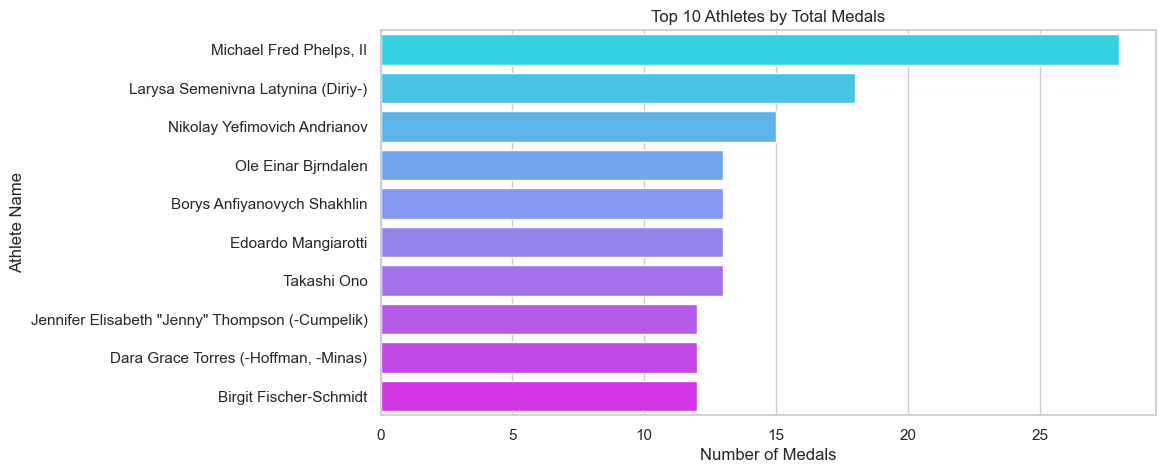

🏆 Top 10 Countries by Medal Points:
 Team
United States    11679
Soviet Union      5283
Germany           3969
Great Britain     3293
Italy             3105
France            2978
Sweden            2812
Canada            2500
Australia         2443
Hungary           2321
Name: Medal_Points, dtype: int64


C:\Users\mayur\AppData\Local\Temp\ipykernel_12232\551186955.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_medals.values, y=country_medals.index, palette="viridis")


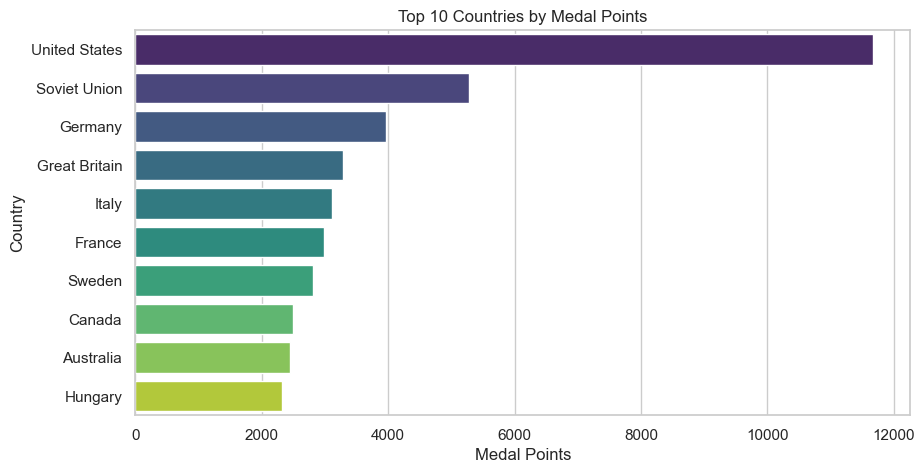

🥇 Top 10 Sports by Medal Points:
 Sport
Athletics     7981
Swimming      6239
Rowing        5878
Gymnastics    4584
Fencing       3514
Football      3114
Hockey        3062
Ice Hockey    3061
Wrestling     2537
Cycling       2536
Name: Medal_Points, dtype: int64


C:\Users\mayur\AppData\Local\Temp\ipykernel_12232\551186955.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sport_medals.values, y=sport_medals.index, palette="magma")


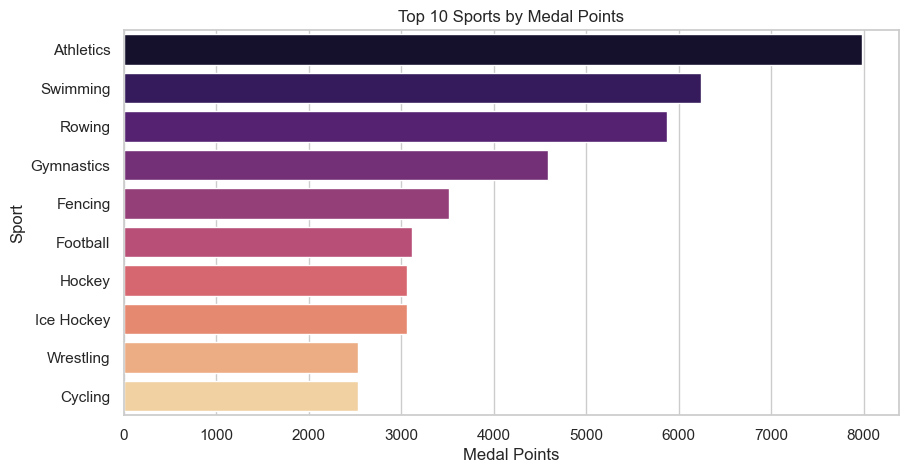

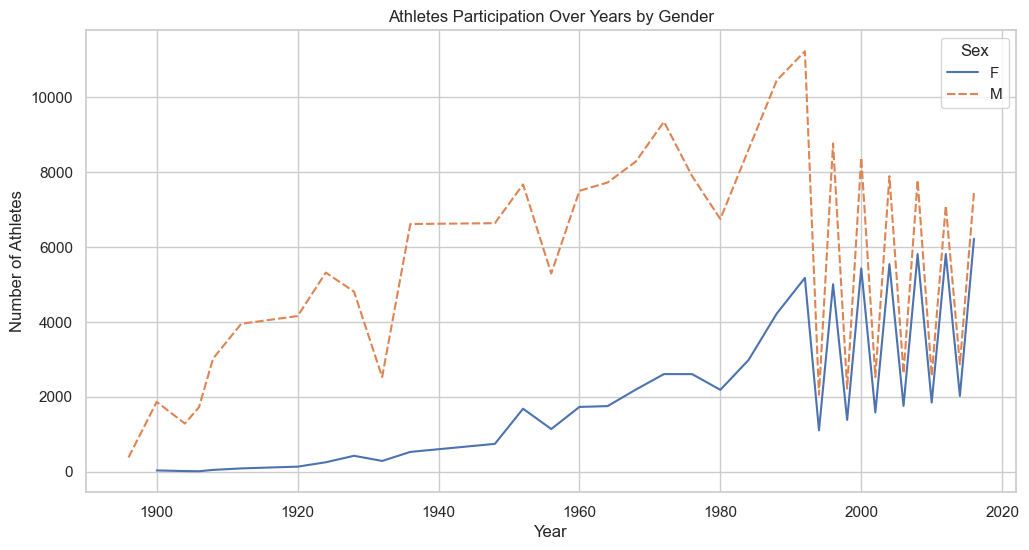

Age Group Medal Points:
 Age_Group
Experienced    11073
Prime          22928
Teen            2427
Veteran         2043
Young          41147
Name: Medal_Points, dtype: int64


C:\Users\mayur\AppData\Local\Temp\ipykernel_12232\551186955.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_medals.index, y=age_medals.values, palette="pastel")


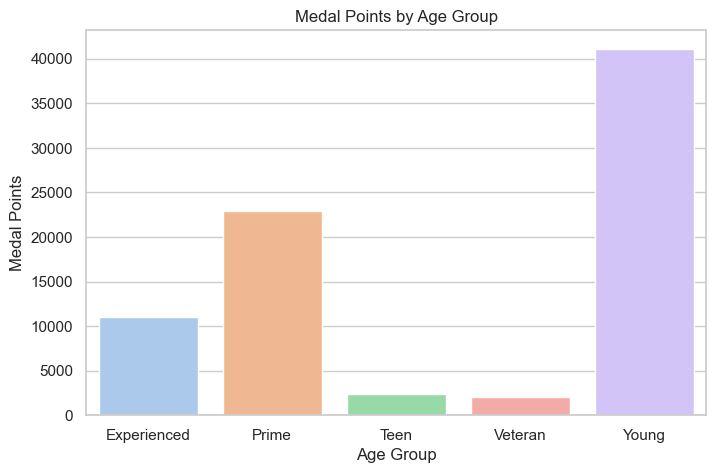

🏙️ Top 10 Cities by Medal Points:
 City
London            7249
Athina            5227
Los Angeles       4266
Beijing           4057
Rio de Janeiro    4008
Sydney            3991
Atlanta           3663
Barcelona         3379
Seoul             3135
Paris             2876
Name: Medal_Points, dtype: int64


C:\Users\mayur\AppData\Local\Temp\ipykernel_12232\551186955.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_medals.values, y=city_medals.index, palette="cubehelix")


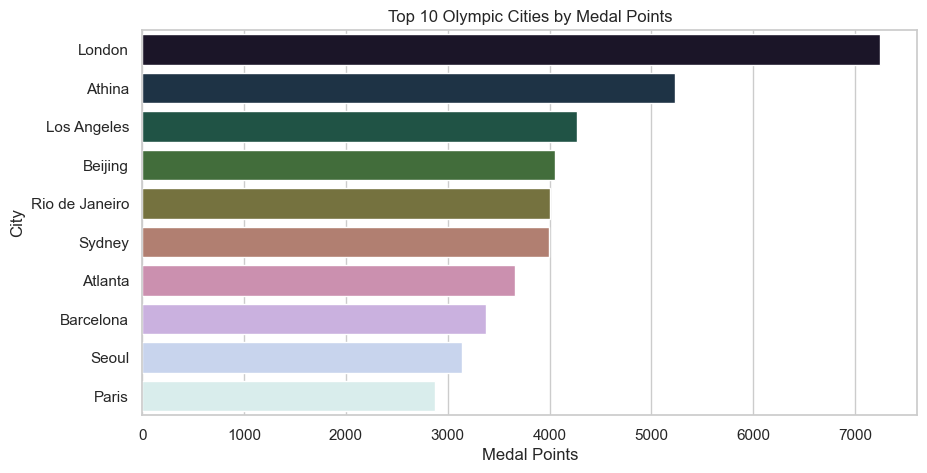

In [16]:
# ===========================
# Extended Olympics Data Analytics
# ===========================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# ---------------------------
# 1️⃣ Load cleaned dataset
# ---------------------------
file_path = r"E:\data\athlete_events.csv"  # replace with your path
df = pd.read_csv(file_path)

# Clean dataset (as before)
df = df.drop_duplicates()
df = df.copy()

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Height'] = df['Height'].fillna(df['Height'].median())
df['Weight'] = df['Weight'].fillna(df['Weight'].median())
df['Medal'] = df['Medal'].fillna("None")

# Helper columns
def age_group(age):
    if age < 18:
        return "Teen"
    elif age <= 25:
        return "Young"
    elif age <= 30:
        return "Prime"
    elif age <= 40:
        return "Experienced"
    else:
        return "Veteran"

df['Age_Group'] = df['Age'].apply(age_group)
medal_points = {'Gold': 3, 'Silver': 2, 'Bronze': 1, 'None': 0}
df['Medal_Points'] = df['Medal'].map(medal_points)

# ---------------------------
# 2️⃣ Top 10 Athletes by Medals
# ---------------------------
athlete_medals = df[df['Medal'] != 'None'].groupby('Name')['Medal'].count().sort_values(ascending=False).head(10)
print("🏅 Top 10 Athletes by Number of Medals:\n", athlete_medals)

# Visualization
plt.figure(figsize=(10,5))
sns.barplot(x=athlete_medals.values, y=athlete_medals.index, palette="cool")
plt.title("Top 10 Athletes by Total Medals")
plt.xlabel("Number of Medals")
plt.ylabel("Athlete Name")
plt.show()

# ---------------------------
# 3️⃣ Medals by Country
# ---------------------------
country_medals = df[df['Medal'] != 'None'].groupby('Team')['Medal_Points'].sum().sort_values(ascending=False).head(10)
print("🏆 Top 10 Countries by Medal Points:\n", country_medals)

plt.figure(figsize=(10,5))
sns.barplot(x=country_medals.values, y=country_medals.index, palette="viridis")
plt.title("Top 10 Countries by Medal Points")
plt.xlabel("Medal Points")
plt.ylabel("Country")
plt.show()

# ---------------------------
# 4️⃣ Medals by Sport
# ---------------------------
sport_medals = df[df['Medal'] != 'None'].groupby('Sport')['Medal_Points'].sum().sort_values(ascending=False).head(10)
print("🥇 Top 10 Sports by Medal Points:\n", sport_medals)

plt.figure(figsize=(10,5))
sns.barplot(x=sport_medals.values, y=sport_medals.index, palette="magma")
plt.title("Top 10 Sports by Medal Points")
plt.xlabel("Medal Points")
plt.ylabel("Sport")
plt.show()

# ---------------------------
# 5️⃣ Gender Distribution Over Years
# ---------------------------
gender_year = df.pivot_table(index='Year', columns='Sex', values='Name', aggfunc='count')

plt.figure(figsize=(12,6))
sns.lineplot(data=gender_year)
plt.title("Athletes Participation Over Years by Gender")
plt.xlabel("Year")
plt.ylabel("Number of Athletes")
plt.show()

# ---------------------------
# 6️⃣ Age Group Distribution by Medals
# ---------------------------
age_medals = df[df['Medal'] != 'None'].groupby('Age_Group')['Medal_Points'].sum()
print("Age Group Medal Points:\n", age_medals)

plt.figure(figsize=(8,5))
sns.barplot(x=age_medals.index, y=age_medals.values, palette="pastel")
plt.title("Medal Points by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Medal Points")
plt.show()

# ---------------------------
# 7️⃣ City-wise Medal Summary (Optional)
# ---------------------------
city_medals = df[df['Medal'] != 'None'].groupby('City')['Medal_Points'].sum().sort_values(ascending=False).head(10)
print("🏙️ Top 10 Cities by Medal Points:\n", city_medals)

plt.figure(figsize=(10,5))
sns.barplot(x=city_medals.values, y=city_medals.index, palette="cubehelix")
plt.title("Top 10 Olympic Cities by Medal Points")
plt.xlabel("Medal Points")
plt.ylabel("City")
plt.show()

# ===========================
# ✅ Done: Full Olympics Analytics Report
# ===========================


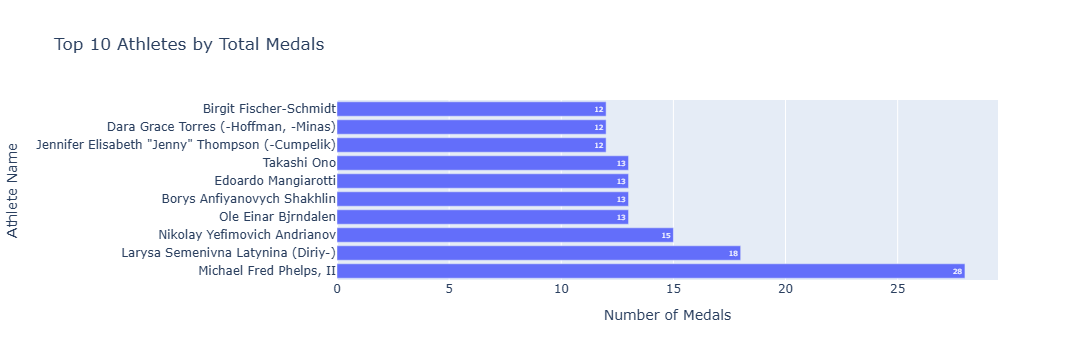

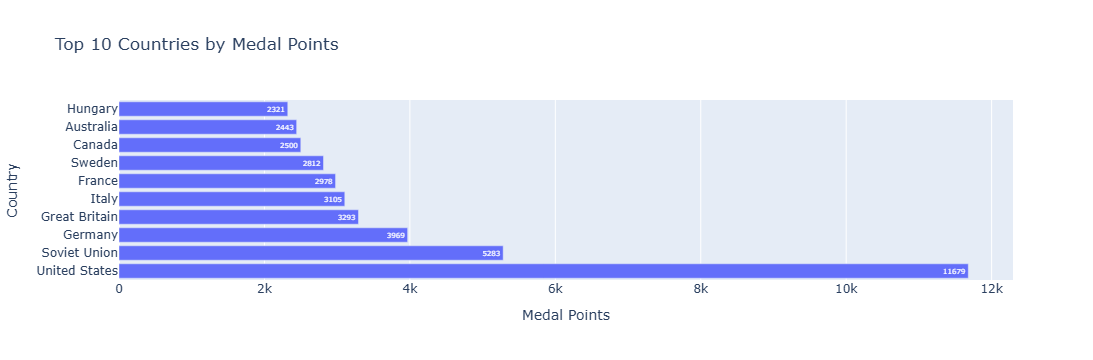

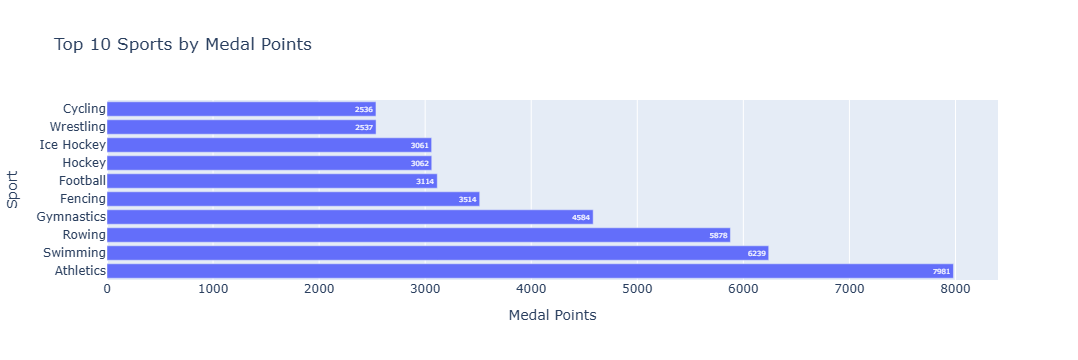

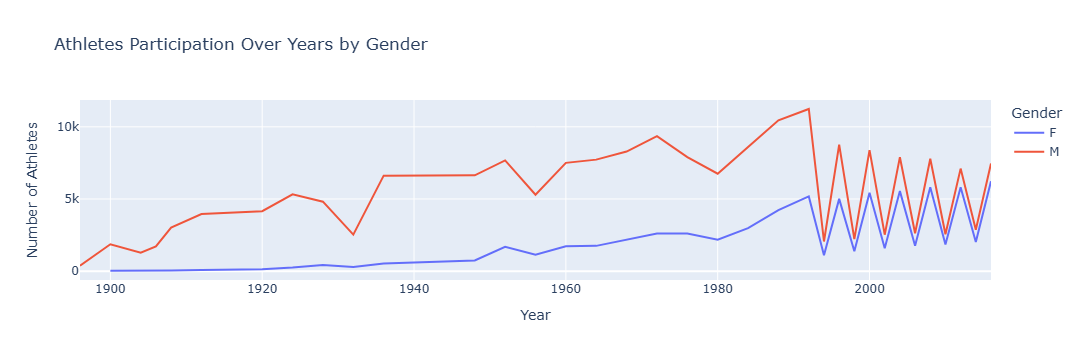

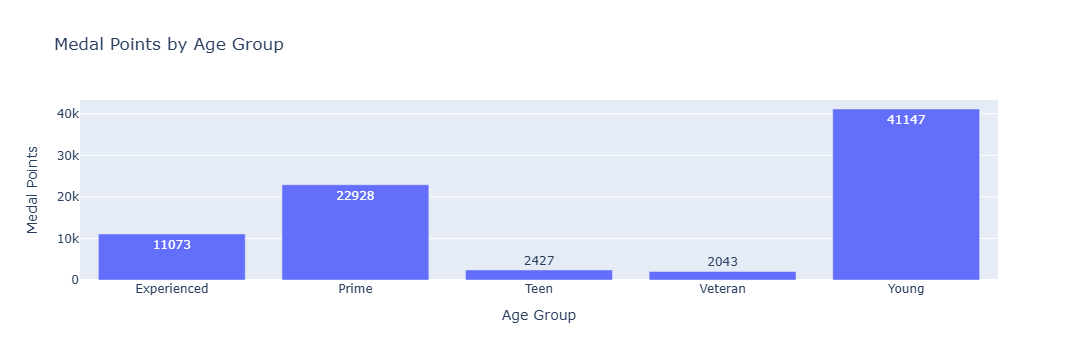

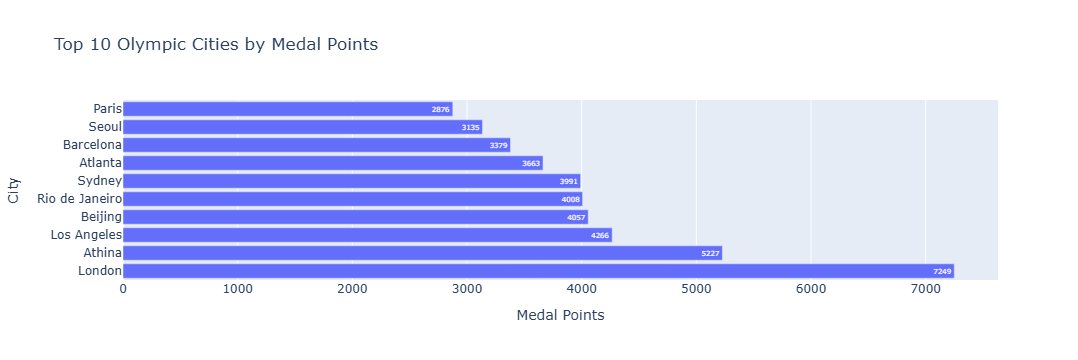

In [17]:
# ===========================
# Interactive Olympics Dashboard using Plotly
# ===========================

import pandas as pd
import plotly.express as px

# ---------------------------
# 1️⃣ Load cleaned dataset
# ---------------------------
file_path = r"E:\data\athlete_events.csv"  # replace with your path
df = pd.read_csv(file_path)
df = df.drop_duplicates().copy()

# Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Height'] = df['Height'].fillna(df['Height'].median())
df['Weight'] = df['Weight'].fillna(df['Weight'].median())
df['Medal'] = df['Medal'].fillna("None")

# Helper columns
def age_group(age):
    if age < 18:
        return "Teen"
    elif age <= 25:
        return "Young"
    elif age <= 30:
        return "Prime"
    elif age <= 40:
        return "Experienced"
    else:
        return "Veteran"

df['Age_Group'] = df['Age'].apply(age_group)
medal_points = {'Gold': 3, 'Silver': 2, 'Bronze': 1, 'None': 0}
df['Medal_Points'] = df['Medal'].map(medal_points)

# ---------------------------
# 2️⃣ Top 10 Athletes by Medals
# ---------------------------
athlete_medals = df[df['Medal'] != 'None'].groupby('Name')['Medal'].count().sort_values(ascending=False).head(10)
fig_athletes = px.bar(
    x=athlete_medals.values, 
    y=athlete_medals.index, 
    orientation='h', 
    title="Top 10 Athletes by Total Medals",
    labels={'x':'Number of Medals', 'y':'Athlete Name'},
    text=athlete_medals.values
)
fig_athletes.show()

# ---------------------------
# 3️⃣ Top 10 Countries by Medal Points
# ---------------------------
country_medals = df[df['Medal'] != 'None'].groupby('Team')['Medal_Points'].sum().sort_values(ascending=False).head(10)
fig_countries = px.bar(
    x=country_medals.values,
    y=country_medals.index,
    orientation='h',
    title="Top 10 Countries by Medal Points",
    labels={'x':'Medal Points','y':'Country'},
    text=country_medals.values
)
fig_countries.show()

# ---------------------------
# 4️⃣ Top 10 Sports by Medal Points
# ---------------------------
sport_medals = df[df['Medal'] != 'None'].groupby('Sport')['Medal_Points'].sum().sort_values(ascending=False).head(10)
fig_sports = px.bar(
    x=sport_medals.values,
    y=sport_medals.index,
    orientation='h',
    title="Top 10 Sports by Medal Points",
    labels={'x':'Medal Points','y':'Sport'},
    text=sport_medals.values
)
fig_sports.show()

# ---------------------------
# 5️⃣ Gender Participation Over Years
# ---------------------------
gender_year = df.pivot_table(index='Year', columns='Sex', values='Name', aggfunc='count').reset_index()
fig_gender = px.line(
    gender_year,
    x='Year',
    y=['F','M'],
    title="Athletes Participation Over Years by Gender",
    labels={'value':'Number of Athletes','variable':'Gender'}
)
fig_gender.show()

# ---------------------------
# 6️⃣ Age Group Medal Points
# ---------------------------
age_medals = df[df['Medal'] != 'None'].groupby('Age_Group')['Medal_Points'].sum().sort_index()
fig_age = px.bar(
    x=age_medals.index,
    y=age_medals.values,
    title="Medal Points by Age Group",
    labels={'x':'Age Group','y':'Medal Points'},
    text=age_medals.values
)
fig_age.show()

# ---------------------------
# 7️⃣ Top 10 Olympic Cities by Medal Points
# ---------------------------
city_medals = df[df['Medal'] != 'None'].groupby('City')['Medal_Points'].sum().sort_values(ascending=False).head(10)
fig_city = px.bar(
    x=city_medals.values,
    y=city_medals.index,
    orientation='h',
    title="Top 10 Olympic Cities by Medal Points",
    labels={'x':'Medal Points','y':'City'},
    text=city_medals.values
)
fig_city.show()


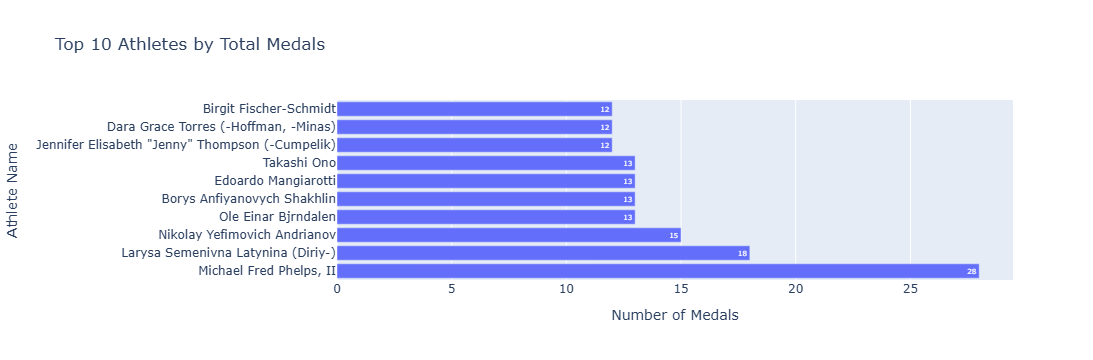

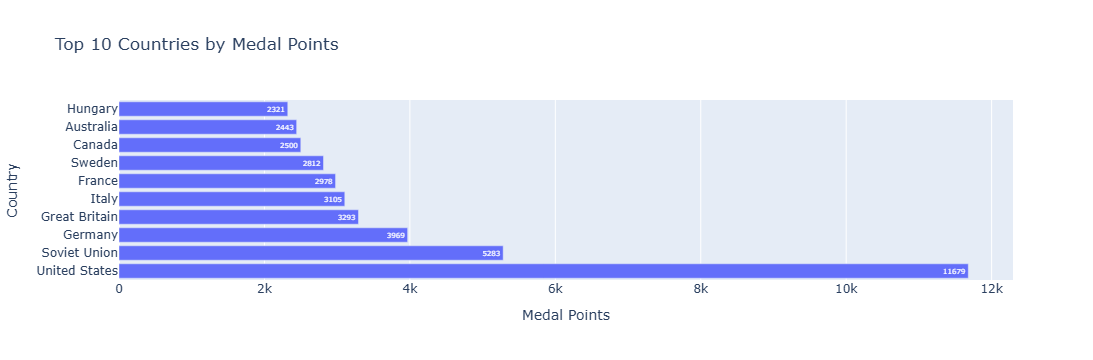

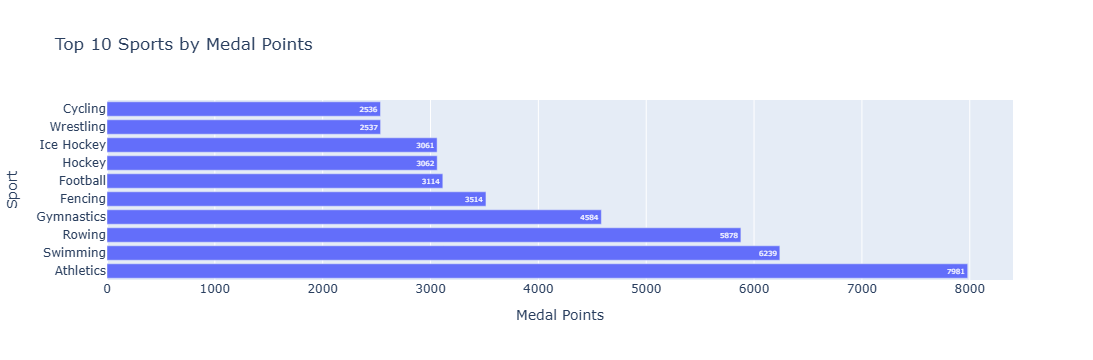

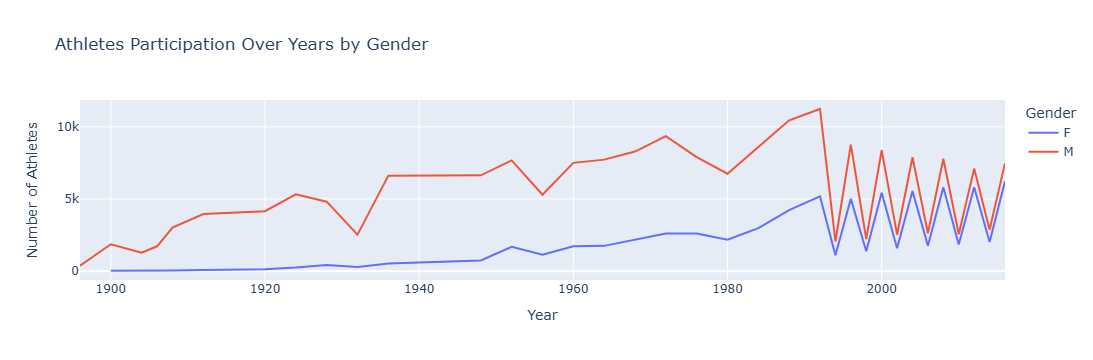

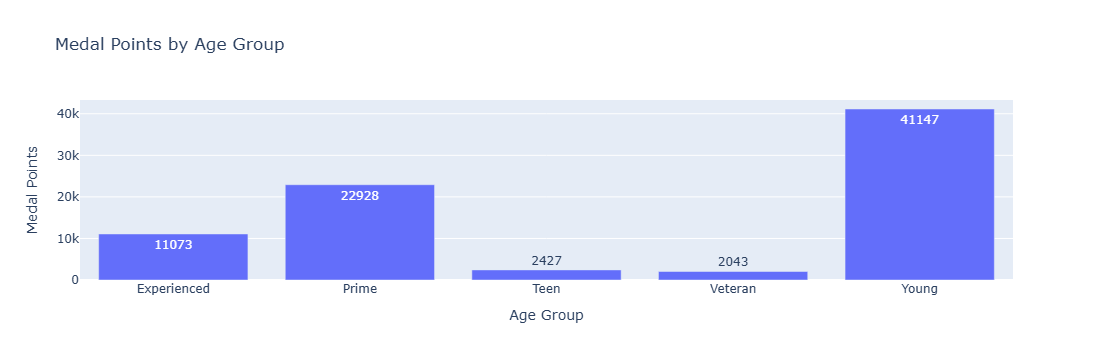

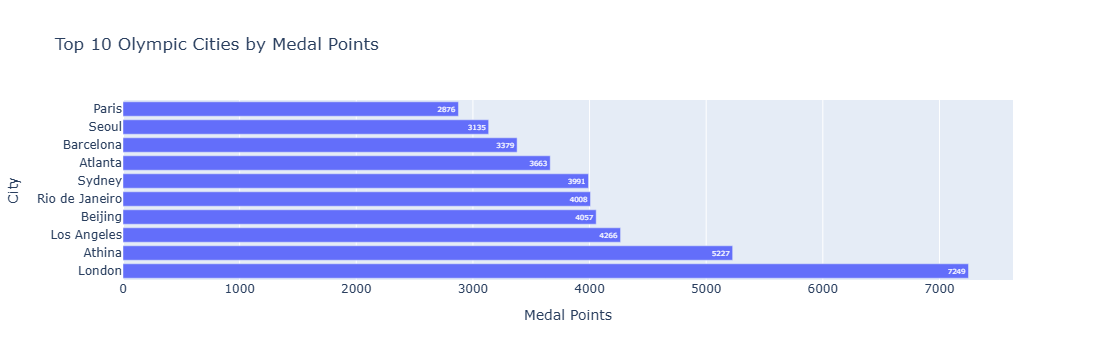

In [1]:
# ===========================
# IMPORT LIBRARIES
# ===========================

import pandas as pd              # pandas: used for data manipulation and analysis
import plotly.express as px      # plotly.express: used for interactive plotting (charts, graphs)

# ===========================
# 1️ LOAD CLEANED DATASET
# ===========================

# 'file_path' is a string variable holding the path to your CSV file
file_path = r"E:\data\athlete_events.csv"  

# pd.read_csv(): reads a CSV file and creates a DataFrame (df) which is like an Excel sheet in Python
df = pd.read_csv(file_path)

# drop_duplicates(): removes duplicate rows if any exist
# .copy(): makes sure we are working on a copy of the DataFrame to avoid warnings
df = df.drop_duplicates().copy()

# Fill missing values (NaNs) for numeric columns with median value
df['Age'] = df['Age'].fillna(df['Age'].median())       # fill missing 'Age' with median age
df['Height'] = df['Height'].fillna(df['Height'].median()) # fill missing 'Height' with median height
df['Weight'] = df['Weight'].fillna(df['Weight'].median()) # fill missing 'Weight' with median weight

# Fill missing values for 'Medal' column with "None" string
# So we know athletes without medals explicitly
df['Medal'] = df['Medal'].fillna("None")

# ===========================
# 2️ CREATE HELPER COLUMNS
# ===========================

# Define a function to classify athletes into age groups
def age_group(age):
    if age < 18:
        return "Teen"             # Ages below 18 → Teen
    elif age <= 25:
        return "Young"            # Ages 18–25 → Young
    elif age <= 30:
        return "Prime"            # Ages 26–30 → Prime
    elif age <= 40:
        return "Experienced"      # Ages 31–40 → Experienced
    else:
        return "Veteran"          # Age > 40 → Veteran

# Apply the 'age_group' function to the 'Age' column to create a new column 'Age_Group'
# .apply() applies a function to each row or value in a column
df['Age_Group'] = df['Age'].apply(age_group)

# Map medals to points for analysis: Gold=3, Silver=2, Bronze=1, None=0
medal_points = {'Gold': 3, 'Silver': 2, 'Bronze': 1, 'None': 0}

# Create a new column 'Medal_Points' using the mapping
df['Medal_Points'] = df['Medal'].map(medal_points)
# .map(): replaces each value in a column according to the dictionary

# ===========================
# 3️ TOP 10 ATHLETES BY MEDALS
# ===========================

# Filter only rows where athletes won medals
# Then group by 'Name' and count medals
athlete_medals = df[df['Medal'] != 'None'].groupby('Name')['Medal'].count()

# Sort values in descending order and select top 10
athlete_medals = athlete_medals.sort_values(ascending=False).head(10)

# px.bar(): creates a horizontal bar chart
fig_athletes = px.bar(
    x=athlete_medals.values,        # x-axis → number of medals
    y=athlete_medals.index,         # y-axis → athlete names
    orientation='h',                # horizontal bars
    title="Top 10 Athletes by Total Medals",
    labels={'x':'Number of Medals', 'y':'Athlete Name'}, # axis labels
    text=athlete_medals.values      # show exact medal counts on bars
)
fig_athletes.show()                 # display the interactive chart

# ===========================
# 4️ TOP 10 COUNTRIES BY MEDAL POINTS
# ===========================

# Filter only medal winners, group by 'Team' (Country), sum Medal_Points
country_medals = df[df['Medal'] != 'None'].groupby('Team')['Medal_Points'].sum()

# Sort and select top 10
country_medals = country_medals.sort_values(ascending=False).head(10)

# Plot horizontal bar chart
fig_countries = px.bar(
    x=country_medals.values, y=country_medals.index,
    orientation='h',
    title="Top 10 Countries by Medal Points",
    labels={'x':'Medal Points','y':'Country'},
    text=country_medals.values
)
fig_countries.show()

# ===========================
# 5️ TOP 10 SPORTS BY MEDAL POINTS
# ===========================

sport_medals = df[df['Medal'] != 'None'].groupby('Sport')['Medal_Points'].sum()
sport_medals = sport_medals.sort_values(ascending=False).head(10)

fig_sports = px.bar(
    x=sport_medals.values, y=sport_medals.index,
    orientation='h',
    title="Top 10 Sports by Medal Points",
    labels={'x':'Medal Points','y':'Sport'},
    text=sport_medals.values
)
fig_sports.show()

# ==========================
# 6️ GENDER PARTICIPATION OVER YEARS
# ===========================

# pivot_table: reshape data, index=Year, columns=Sex, count Name
# This gives number of male and female participants each year
gender_year = df.pivot_table(index='Year', columns='Sex', values='Name', aggfunc='count').reset_index()

# px.line(): line chart
fig_gender = px.line(
    gender_year,
    x='Year',
    y=['F','M'],                  # plot female & male
    title="Athletes Participation Over Years by Gender",
    labels={'value':'Number of Athletes','variable':'Gender'}
)
fig_gender.show()

# ===========================
# 7️ AGE GROUP MEDAL POINTS
# ===========================

# Group by 'Age_Group' and sum Medal_Points
age_medals = df[df['Medal'] != 'None'].groupby('Age_Group')['Medal_Points'].sum().sort_index()

fig_age = px.bar(
    x=age_medals.index, y=age_medals.values,
    title="Medal Points by Age Group",
    labels={'x':'Age Group','y':'Medal Points'},
    text=age_medals.values
)
fig_age.show()

# ===========================
# 8️ TOP 10 OLYMPIC CITIES BY MEDAL POINTS
# ===========================

city_medals = df[df['Medal'] != 'None'].groupby('City')['Medal_Points'].sum().sort_values(ascending=False).head(10)

fig_city = px.bar(
    x=city_medals.values, y=city_medals.index,
    orientation='h',
    title="Top 10 Olympic Cities by Medal Points",
    labels={'x':'Medal Points','y':'City'},
    text=city_medals.values
)
fig_city.show()
